In [1]:
import numpy as np
from scipy.interpolate import CubicSpline
from pandas import DataFrame
from typing import cast
import matplotlib.pyplot as plt

from stochastic_volatility_models.src.core.underlying import Underlying
from stochastic_volatility_models.src.core.volatility_surface import VolatilitySurface
from stochastic_volatility_models.src.core.pricing_models import PricingModel
from stochastic_volatility_models.src.utils.options.strikes import find_closest_strikes
from stochastic_volatility_models.src.utils.options.expiry import time_to_expiry
from stochastic_volatility_models.src.data.rates import get_risk_free_interest_rate
from stochastic_volatility_models.src.data.dividends import get_dividend_yield
from stochastic_volatility_models.visualisations.volatility_surface import plot_volatility_surface

2024-07-30 12:58:15.895 | INFO     | stochastic_volatility_models.config:initialise:30 - Loaded module `stochastic_volatility_models` from project directory path `/Users/mayurankv/Documents/Mayuran/Programming/Projects/Academic/Imperial College London/MSc Statistics/Dissertation/Project/modules`


In [2]:
ticker = "SPX"
spx = Underlying(ticker)
pricing_model = PricingModel("Black-Scholes")

In [3]:
expiries = np.array(
	["2022-03-04", "2022-03-09", "2022-03-11", "2022-03-18", "2022-03-23", "2022-03-25", "2022-03-30", "2022-03-31", "2022-04-01", "2022-04-08", "2022-04-14", "2022-04-22", "2022-04-29", "2022-05-20", "2022-05-31", "2022-06-17", "2022-06-30", "2022-07-15", "2022-07-29", "2022-08-31"], dtype=np.datetime64
)
strikes = np.array(
	[
		2200,
		2400,
		2600,
		2800,
		3000,
		3200,
		3400,
		3500,
		3600,
		3700,
		3800,
		3850,
		3900,
		3950,
		3975,
		4000,
		4025,
		4040,
		4050,
		4060,
		4070,
		4075,
		4080,
		4090,
		4100,
		4110,
		4120,
		4125,
		4130,
		4140,
		4150,
		4160,
		4170,
		4175,
		4180,
		4190,
		4200,
		4210,
		4220,
		4225,
		4230,
		4240,
		4250,
		4260,
		4270,
		4275,
		4280,
		4290,
		4300,
		4310,
		4320,
		4325,
		4330,
		4340,
		4350,
		4360,
		4370,
		4375,
		4380,
		4390,
		4400,
		4410,
		4420,
		4425,
		4430,
		4440,
		4450,
		4460,
		4470,
		4475,
		4480,
		4490,
		4500,
		4510,
		4525,
		4550,
		4600,
		4650,
		4700,
		4800,
		5000,
		5200,
		5400,
	]
)
# strikes = np.array([4100, 4200,4250, 4260, 4270, 4280, 4290, 4300, 4310, 4320, 4340, 4350, 4360, 4370, 4380, 4400, 4500])
spx_vs = VolatilitySurface(
	underlying=spx,
	expiries=expiries,
	strikes=strikes,
	monthly=False,
)
time = np.datetime64("2022-03-03")

In [4]:
volatility_surface = spx_vs
surface = volatility_surface.surface_quantities(
	time=time,
	quantity_method="empirical_pricing_implied_volatility",
	price_types=["Mid"],
	out_the_money=True,
	pricing_model=PricingModel(),
)[0]

/Users/mayurankv/Documents/Mayuran/Programming/Projects/Academic/Imperial College London/MSc Statistics/Dissertation/.venv/lib/python3.12/site-packages/py_vollib_vectorized/implied_volatility.py:75: UserWarning: Found Below Intrinsic contracts at index [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 498, 499, 500, 501, 502, 503, 504, 505, 506, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 992, 993, 994, 995, 996, 997, 998, 999, 1000, 1001, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1325, 1326, 1327, 1328, 1329, 1330, 1331, 1332, 1333, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500, 1660, 1661, 1662, 

In [5]:
# from py_vollib.black_scholes.implied_volatility import implied_volatility as bs_iv
# from py_vollib.black.implied_volatility import implied_volatility as black_iv
# from py_vollib_vectorized.implied_volatility import vectorized_implied_volatility_black as black_iv2
# r = 0.00463216
# # r = 0.00
# print([
# 	bs_iv(143.9,4363.49,4300,0.05205479,r,"c").iat[0,0],
# 	bs_iv(89.55,4363.49,4300,0.05205479,r,"p").iat[0,0],
# ])
# print([
# 	black_iv(143.9,4354.75,4300,r,0.05205479,"c").iat[0,0],
# 	black_iv(89.55,4354.75,4300,r,0.05205479,"p").iat[0,0],
# ])
# print([
# 	black_iv2(143.9,4354.75,4300,r,0.05205479,"c").iat[0,0],
# 	black_iv2(89.55,4354.75,4300,r,0.05205479,"p").iat[0,0],
# ])


```csv
,date,symbol,exdate,last_date,cp_flag,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,delta,gamma,vega,theta,optionid,am_settlement,forward_price,expiry_indicator,root,suffix
,2020-01-02,SPX 200117C3105000,2020-01-17,2020-01-02,C,3105000.0,153.6,157.2,10.0,671.0,0.156797,0.942651,0.00114,72.76864,-150.9554,130670787.0,1.0,,,,
479,2020-01-02,SPX 200117P2845000,2020-01-17,2020-01-02,P,2845000.0,0.4,0.5,11.0,801.0,0.287093,-0.007357,0.000111,12.98967,-48.56858,130670909.0,1.0,,,,
560,2020-01-02,SPX 200117P3250000,2020-01-17,2020-01-02,P,3250000.0,20.6,20.9,4373.0,8051.0,0.096667,-0.444052,0.006401,251.9124,-314.8398,124227906.0,1.0,,,,
247,2020-01-02,SPX 200117C3250000,2020-01-17,2020-01-02,C,3250000.0,28.0,28.4,12398.0,35332.0,0.094324,0.556563,0.006558,251.8049,-311.978,124227821.0,1.0,,,,
249,2020-01-02,SPX 200117C3260000,2020-01-17,2020-01-02,C,3260000.0,21.8,22.2,360.0,6133.0,0.090242,0.489704,0.006923,254.3152,-301.292,130670809.0,1.0,,,,
562,2020-01-02,SPX 200117P3260000,2020-01-17,2020-01-02,P,3260000.0,24.3,24.7,326.0,224.0,0.09239,-0.509323,0.006762,254.3214,-303.3018,130670972.0,1.0,,,,
```

In [6]:
# get_dividend_yield(spx, t, e, True)


In [7]:
# from py_vollib_vectorized.implied_volatility import vectorized_implied_volatility as iv
# t  = np.datetime64("2020-01-02")
# e = np.array([np.datetime64("2020-01-17")])
# t2x = time_to_expiry(t,e)
# r = get_risk_free_interest_rate(t, t2x)
# s =spx.price(t)
# print(s)
# p_p = 20.75
# p_c = 28.2
# K=3250
# q=0.01924966
# # print(bs_iv(p_p,s,K,t2x[0],r[0],"p").iat[0,0])
# print(iv(p_p,s,K,t2x[0],r[0],"p", q=q, model="black_scholes_merton").iat[0,0])
# # print(bs_iv(p_c,s,K,t2x[0],r[0],"c").iat[0,0])
# print(iv(24.5,s,K+10,t2x[0],r[0],"p", q=q, model="black_scholes_merton").iat[0,0])
# print(iv(p_c,s,K,t2x[0],r[0],"c", q=q, model="black_scholes_merton").iat[0,0])
# print(iv(22,s,K+10,t2x[0],r[0],"c", q=q, model="black_scholes_merton").iat[0,0])


In [8]:
# print([
# 	bs_iv(46.95,5470.5898,5460,1/12,r,"c").iat[0,0],
# 	bs_iv(32.55,5470.5898,5460,1/12,r,"p").iat[0,0],
# ])


In [9]:
# display(volatility_surface.empirical_pricing_implied_volatility(time,PricingModel("Black-Scholes")).loc[["SPXW 220323C4300000", "SPXW 220323P4300000"]])
# display(volatility_surface.empirical_pricing_implied_volatility(time,PricingModel("Black-76")).loc[["SPXW 220323C4300000", "SPXW 220323P4300000"]])


In [10]:
# volatility_surface.empirical_price(time).loc[["SPXW 220323C4300000", "SPXW 220323P4300000"]]


T: 2022-03-04
r: 0.004243063047887182
q: 0.028893910341975106


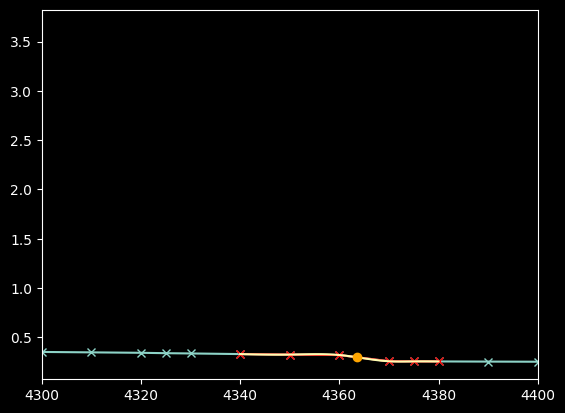

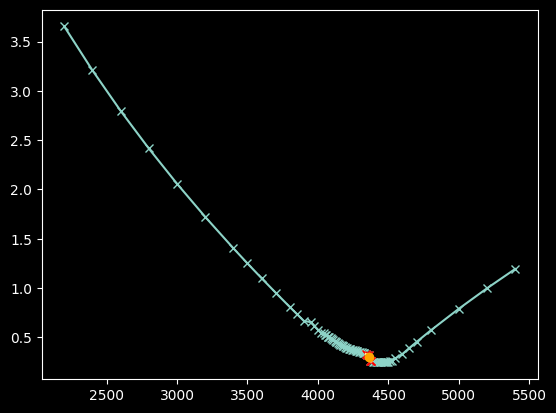

T: 2022-03-09
r: 0.004351115078911429
q: 0.011120903027069062


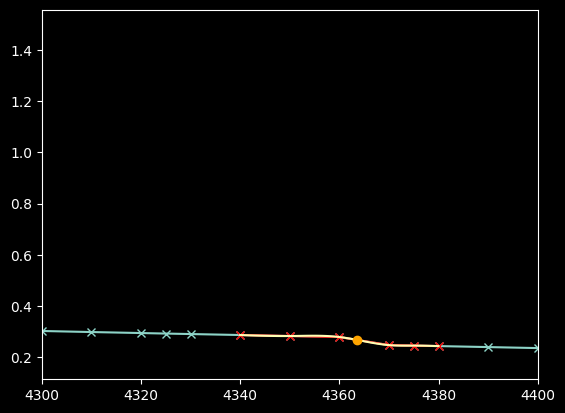

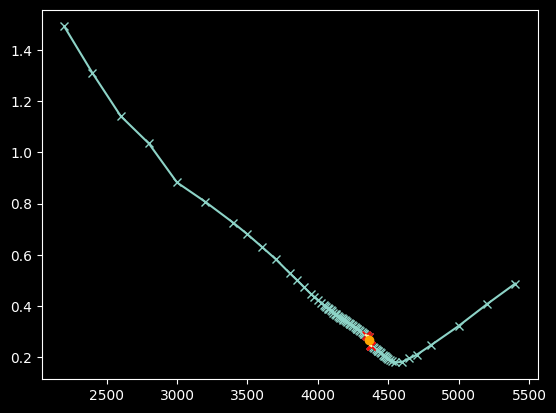

T: 2022-03-11
r: 0.0043943598063137055
q: 0.032638190388438314


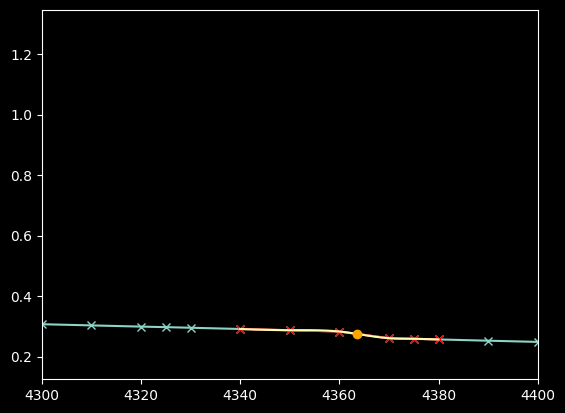

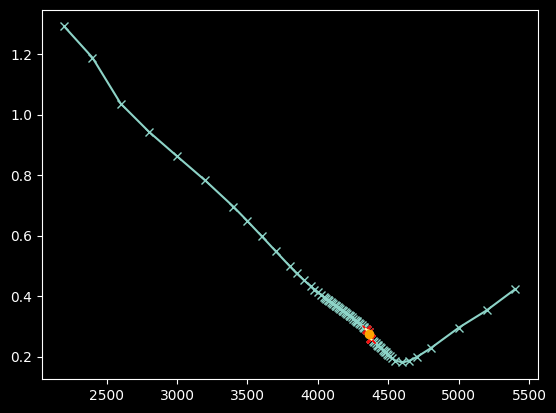

T: 2022-03-18
r: 0.004545723526719447
q: 0.03223106999177662


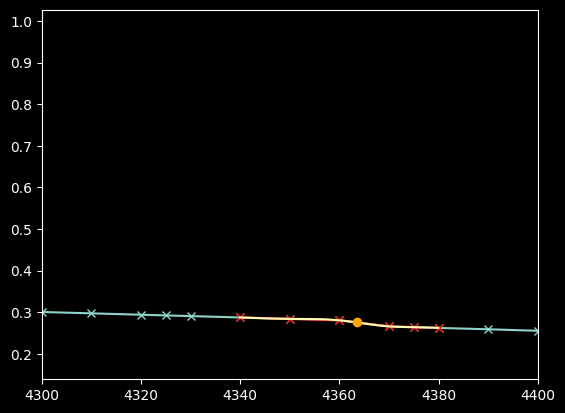

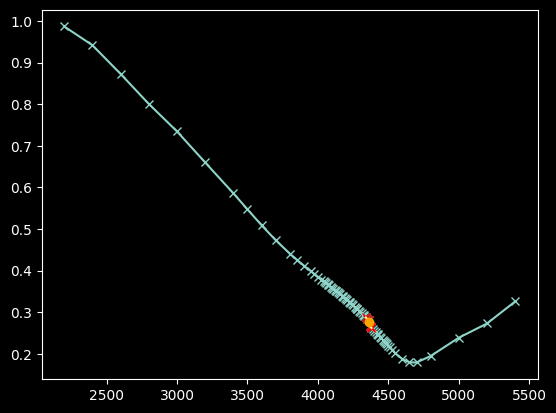

T: 2022-03-23
r: 0.0046537516427511165
q: 0.031872475472577703


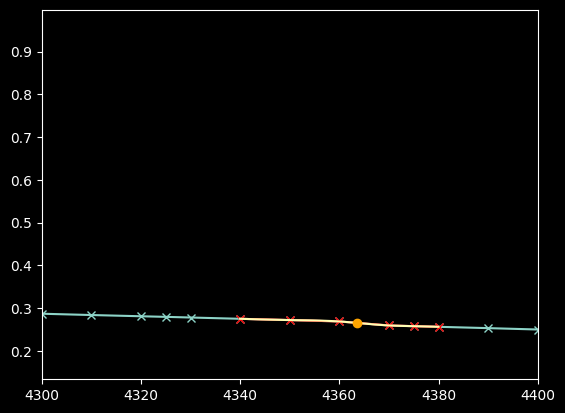

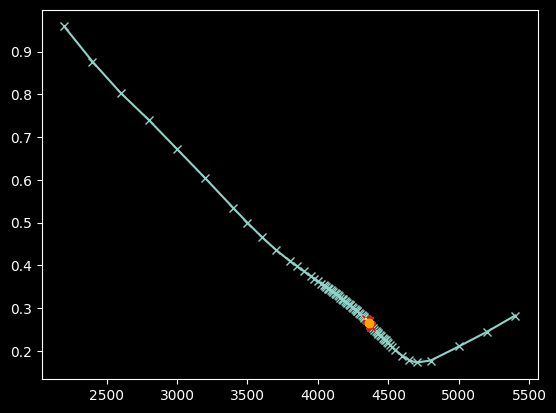

T: 2022-03-25
r: 0.004696919842177142
q: 0.03197388933613266


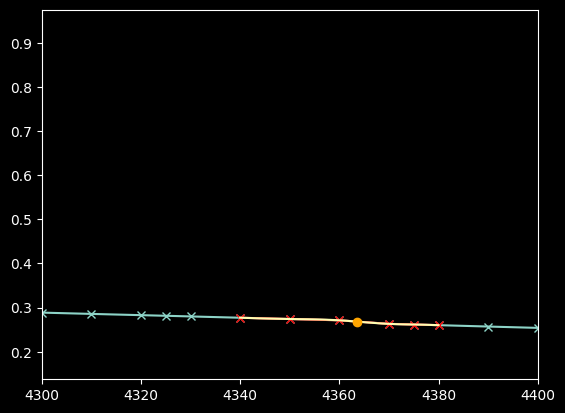

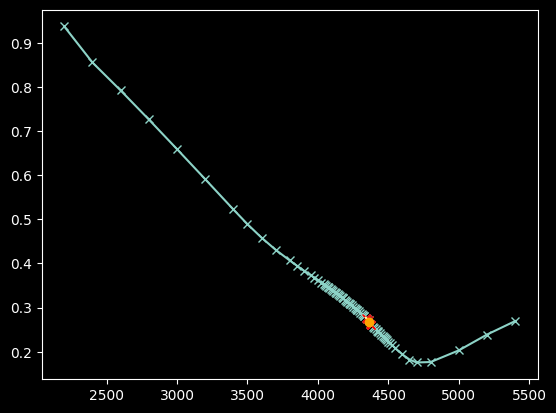

T: 2022-03-30
r: 0.004804684893290452
q: 0.027551223449365374


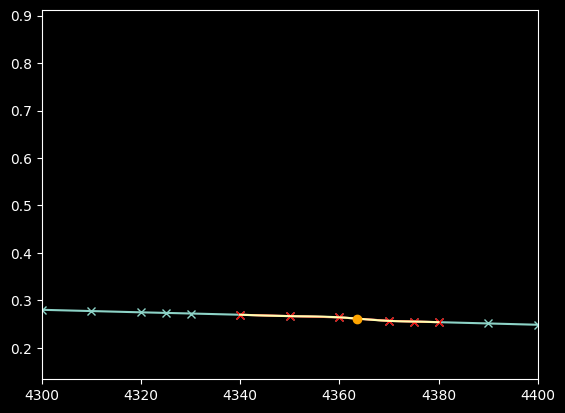

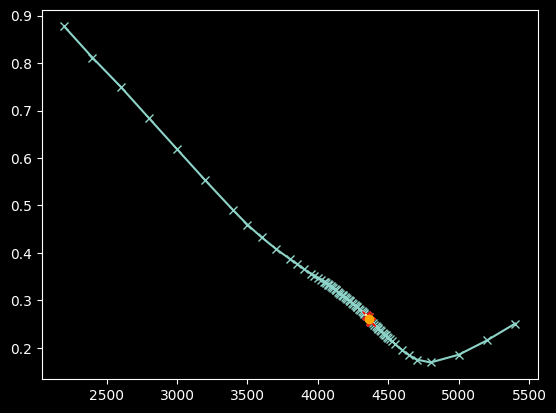

T: 2022-03-31
r: 0.0048262057890945086
q: 0.024859166889570305


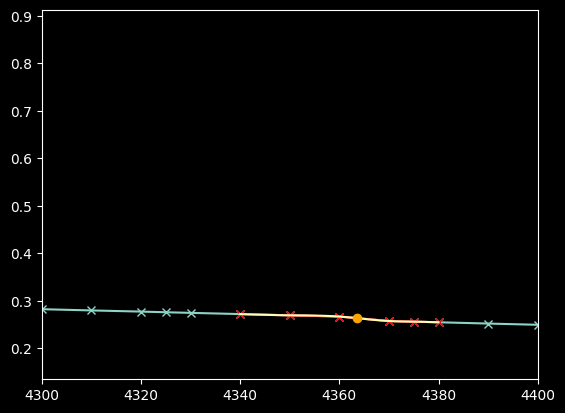

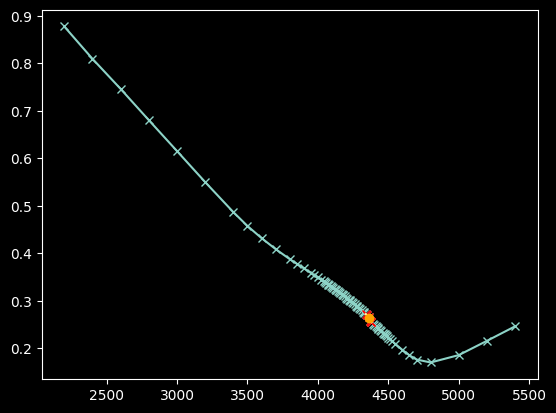

T: 2022-04-01
r: 0.004847714385759525
q: 0.021623044898037763


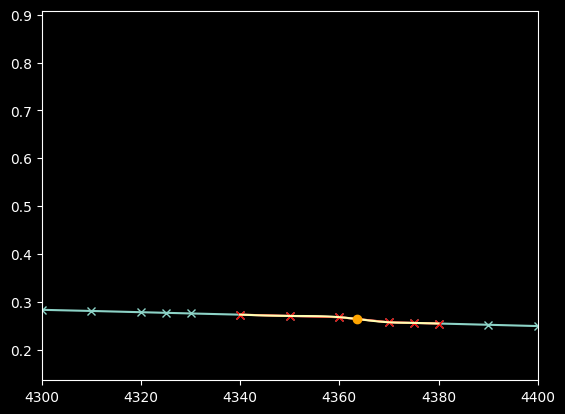

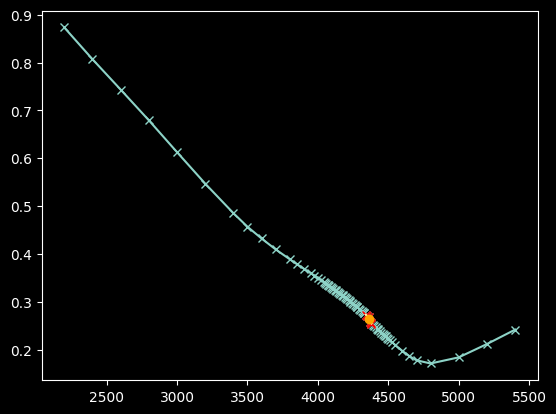

T: 2022-04-08
r: 0.004997900930509644
q: 0.01305628684631309


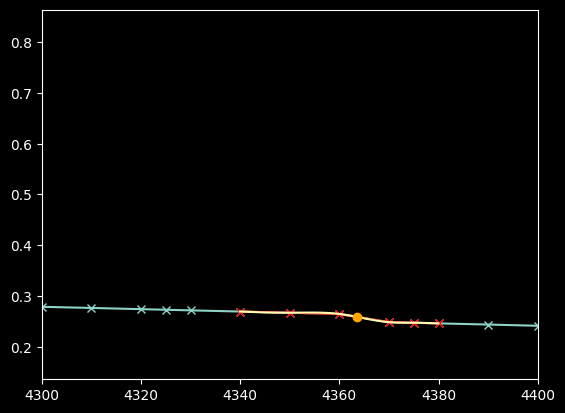

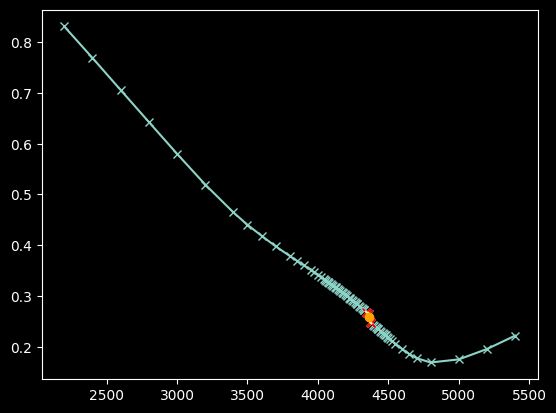

T: 2022-04-14
r: 0.005126121145611073
q: 0.021756034064912725


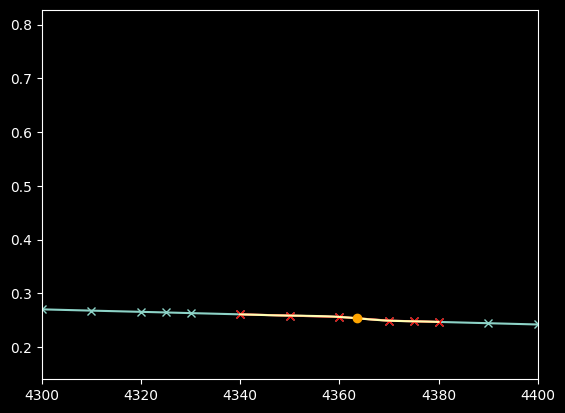

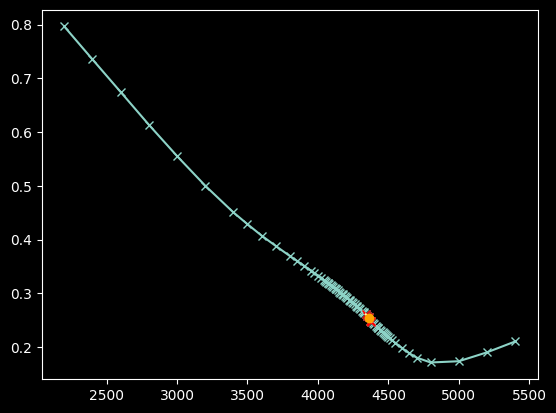

T: 2022-04-22
r: 0.0052963859371048284
q: 0.017858993097401


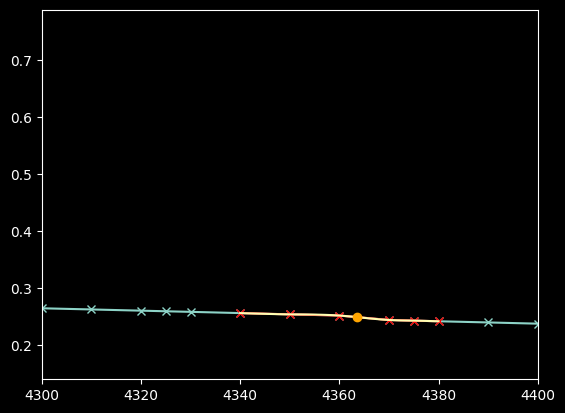

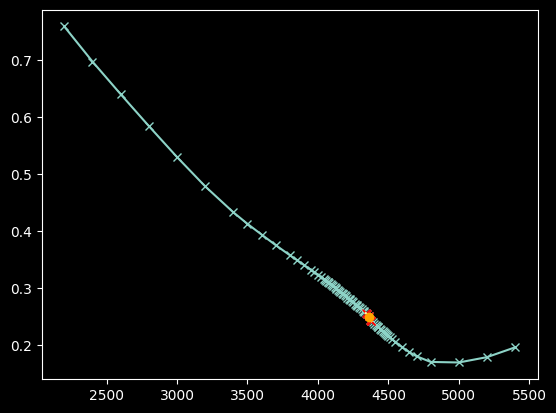

T: 2022-04-29
r: 0.005444751757585346
q: 0.01680621142379044


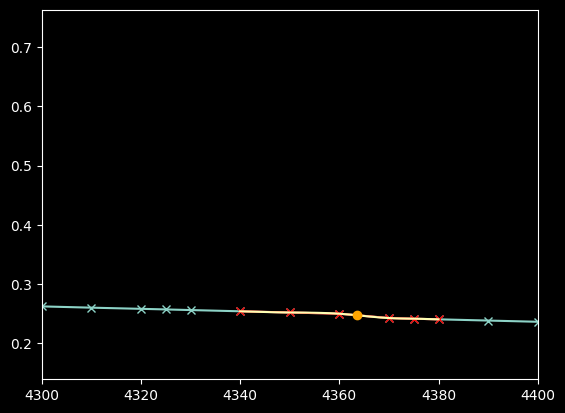

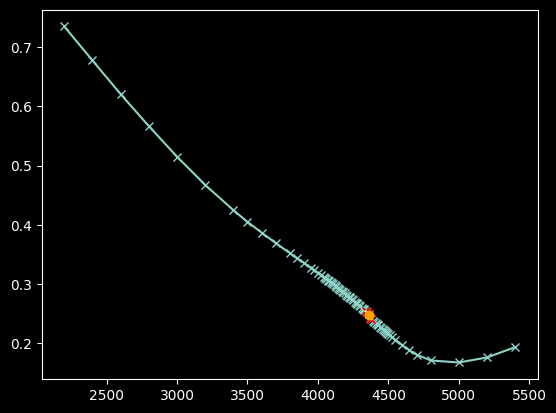

T: 2022-05-20
r: 0.005886622268963968
q: 0.017707513801104035


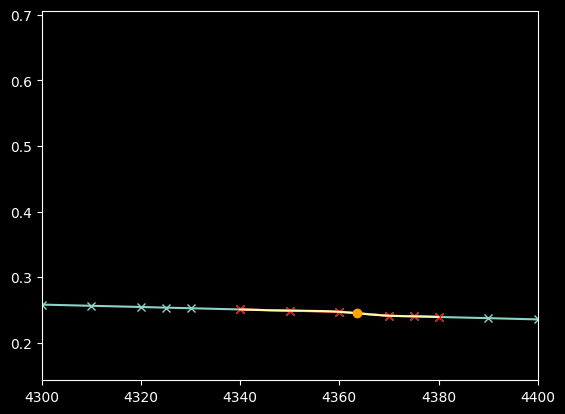

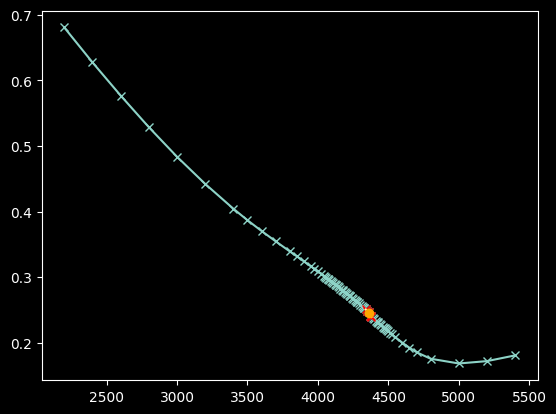

T: 2022-05-31
r: 0.006116113817309536
q: 0.01724481956521686


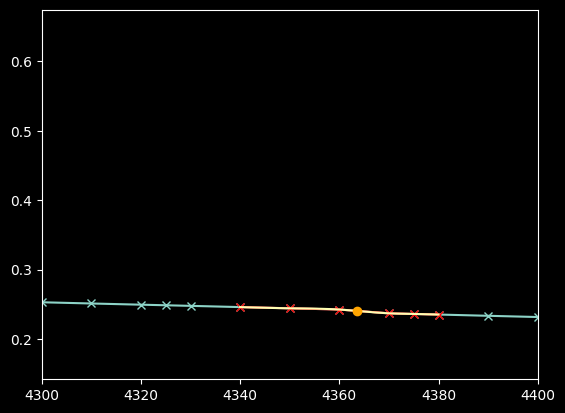

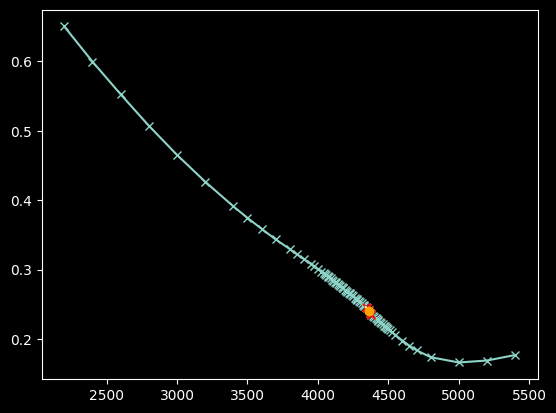

T: 2022-06-17
r: 0.006468026733666774
q: 1.3946364366070267


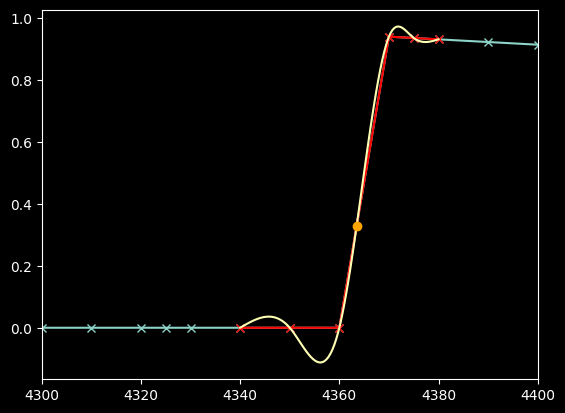

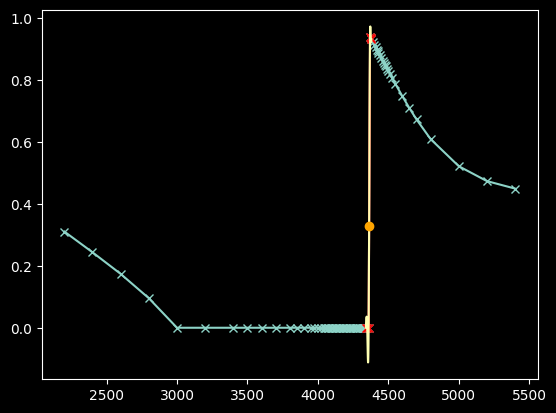

T: 2022-06-30
r: 0.006734869404451865
q: 0.23469896841350774


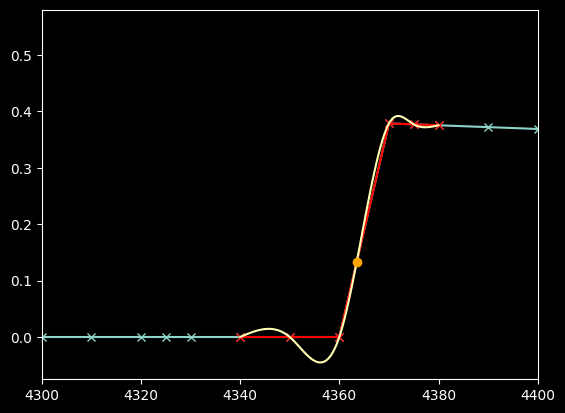

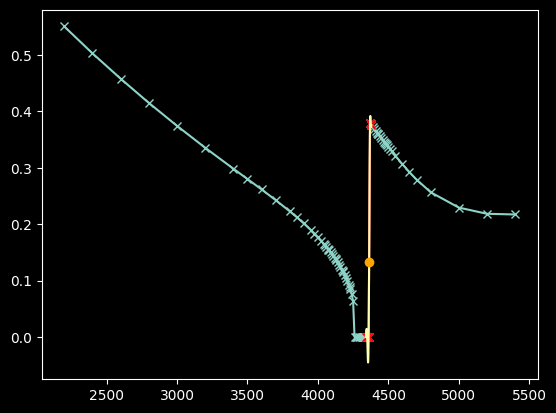

T: 2022-07-15
r: 0.0070403274038247565
q: 0.017154811048450954


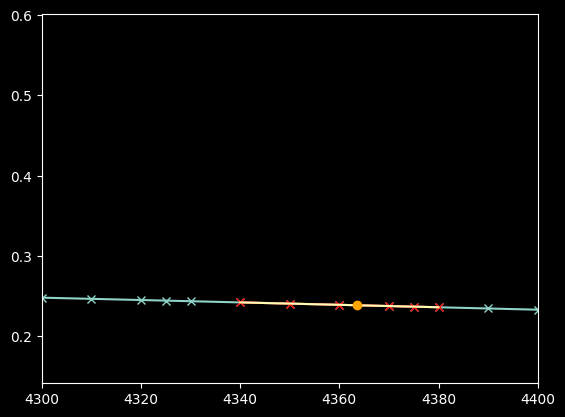

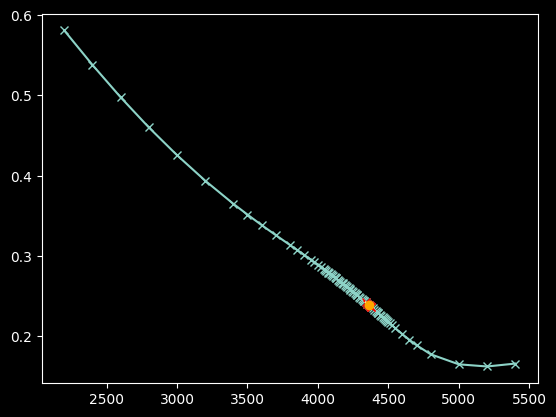

T: 2022-07-29
r: 0.00732305356457291
q: 0.16560990563156247


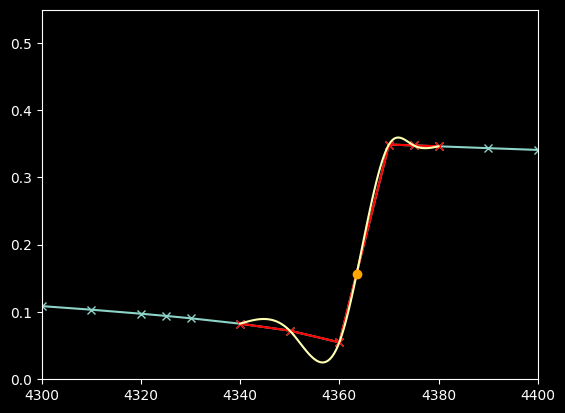

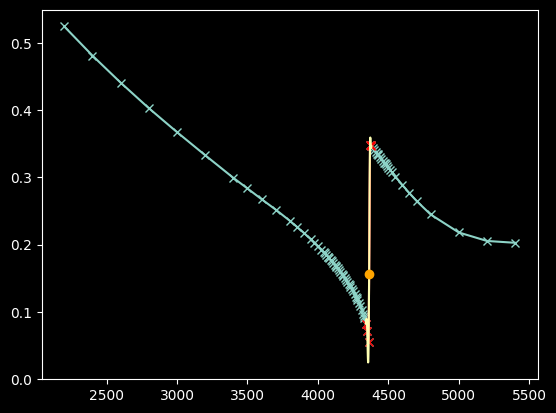

T: 2022-08-31
r: 0.007980361515703907
q: 0.09613138187909173


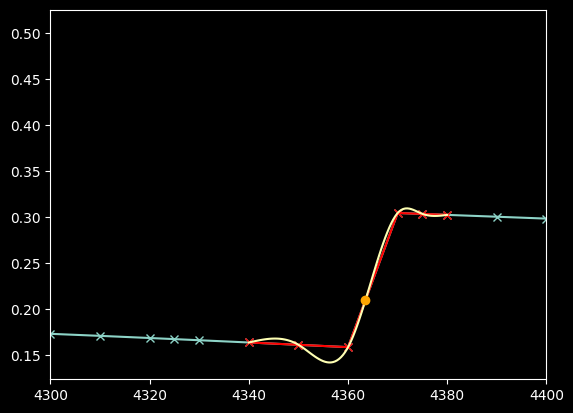

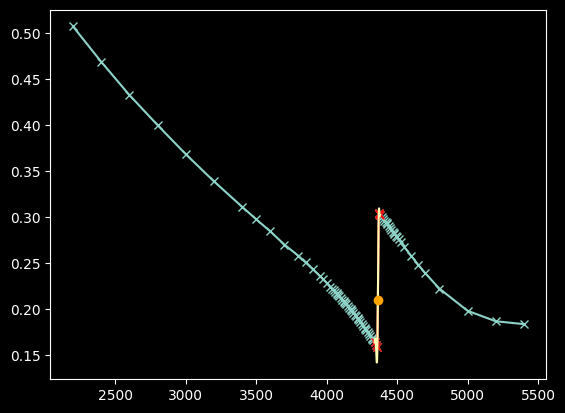

In [23]:
if True:
	for i, expiry in enumerate(volatility_surface.expiries):
		print(f"T: {expiry}")
		t2x = time_to_expiry(time, volatility_surface.expiries)
		print(f"r: {get_risk_free_interest_rate(time, t2x)[i]}")
		print(f"q: {get_dividend_yield(volatility_surface.underlying, time, volatility_surface.expiries, False)[i]}")
		indices = find_closest_strikes(
			strikes=volatility_surface.strikes,
			spot=volatility_surface.underlying.price(time=time),
		)
		# print(indices)
		cs = CubicSpline(
			x=indices,
			y=cast(DataFrame, surface.xs(key=expiry, level=1)).loc[indices, "Symbol"].values,
			bc_type="natural",
		)
		x = np.linspace(indices.min(), indices.max(), 100)
		plt.plot(volatility_surface.strikes, cast(DataFrame, surface.xs(key=expiry, level=1)).loc[volatility_surface.strikes, "Symbol"].values, linestyle=None, marker="x")
		plt.plot(indices, cast(DataFrame, surface.xs(key=expiry, level=1)).loc[indices, "Symbol"].values, linestyle=None, marker="x", color="red")
		plt.plot(x, cs(x))
		plt.plot((spot := volatility_surface.underlying.price(time=time)), cs(spot), color="orange", marker="o")
		plt.gca().set_xlim(4300, 4400)
		# plt.gca().set_ylim(0.22, 0.34)
		plt.show()

		plt.plot(volatility_surface.strikes, cast(DataFrame, surface.xs(key=expiry, level=1)).loc[volatility_surface.strikes, "Symbol"].values, linestyle=None, marker="x")
		plt.plot(indices, cast(DataFrame, surface.xs(key=expiry, level=1)).loc[indices, "Symbol"].values, linestyle=None, marker="x", color="red")
		plt.plot(x, cs(x))
		plt.plot((spot := volatility_surface.underlying.price(time=time)), cs(spot), color="orange", marker="o")
		plt.show()
else:
	np.array(
		[
			CubicSpline(
				x=indices,
				y=cast(DataFrame, surface.xs(key=expiry, level=1)).loc[indices, "Symbol"].values,
				bc_type="natural",
			)(volatility_surface.underlying.price(time=time, expiry=expiry))
			for expiry in volatility_surface.expiries
			if (
				indices := find_closest_strikes(
					strikes=volatility_surface.strikes,
					spot=volatility_surface.underlying.price(time=time, expiry=expiry),
				)
			)
		]
	)

In [30]:
print(f"r: {get_risk_free_interest_rate(time, t2x)}")
print(f"q: {get_dividend_yield(volatility_surface.underlying, time, volatility_surface.expiries, False)}")

r: [0.00424306 0.00435112 0.00439436 0.00454572 0.00465375 0.00469692
 0.00480468 0.00482621 0.00484771 0.0049979  0.00512612 0.00529639
 0.00544475 0.00588662 0.00611611 0.00646803 0.00673487 0.00704033
 0.00732305 0.00798036]
q: [0.02889391 0.0111209  0.03263819 0.03223107 0.03187248 0.03197389
 0.02755122 0.02485917 0.02162304 0.01305629 0.02175603 0.01785899
 0.01680621 0.01770751 0.01724482 1.39463644 0.23469897 0.01715481
 0.16560991 0.09613138]


In [20]:
pricing_model = PricingModel()
fig = plot_volatility_surface(
	time=time,
	volatility_surface=spx_vs,
	quantity_method="empirical_pricing_implied_volatility",
	pricing_model=PricingModel(),
	# plot_parameters={"moneyness": False, "time_to_expiry": False, "log_moneyness": False, "mid_price": True},
)
fig.show()

/Users/mayurankv/Documents/Mayuran/Programming/Projects/Academic/Imperial College London/MSc Statistics/Dissertation/.venv/lib/python3.12/site-packages/py_vollib_vectorized/implied_volatility.py:75: UserWarning:

Found Below Intrinsic contracts at index [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 498, 499, 500, 501, 502, 503, 504, 505, 506, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 992, 993, 994, 995, 996, 997, 998, 999, 1000, 1001, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1325, 1326, 1327, 1328, 1329, 1330, 1331, 1332, 1333, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500, 1660, 1661, 1662,

In [29]:
pricing_model = PricingModel()
fig = plot_volatility_surface(
	time=time,
	volatility_surface=spx_vs,
	quantity_method="empirical_price",
	plot_parameters={"moneyness": False, "time_to_expiry": False, "log_moneyness": False, "mid_price": True},
)
fig.show()

pricing_model = PricingModel()
fig = plot_volatility_surface(
	time=time,
	volatility_surface=spx_vs,
	quantity_method="empirical_price",
	out_the_money=False,
	plot_parameters={"moneyness": False, "time_to_expiry": False, "log_moneyness": False, "mid_price": True},
)
fig.show()

In [28]:
b = spx_vs.empirical_price(time)
a = spx_vs.empirical_pricing_implied_volatility(time, PricingModel())
a

/Users/mayurankv/Documents/Mayuran/Programming/Projects/Academic/Imperial College London/MSc Statistics/Dissertation/.venv/lib/python3.12/site-packages/py_vollib_vectorized/implied_volatility.py:75: UserWarning:

Found Below Intrinsic contracts at index [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 498, 499, 500, 501, 502, 503, 504, 505, 506, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 992, 993, 994, 995, 996, 997, 998, 999, 1000, 1001, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1325, 1326, 1327, 1328, 1329, 1330, 1331, 1332, 1333, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500, 1660, 1661, 1662,

,Bid,Ask,Mid
SPXW 220304C2200000,0.0,5.516755,0.0
SPXW 220304C2400000,0.0,4.869826,0.0
SPXW 220304C2600000,0.0,4.292859,0.0
SPXW 220304C2800000,0.0,3.734042,0.0
SPXW 220304C3000000,0.0,3.193439,0.0
...,...,...,...
SPXW 220831P4700000,0.0,0.000000,0.0
SPXW 220831P4800000,0.0,0.000000,0.0
SPXW 220831P5000000,0.0,0.000000,0.0
SPXW 220831P5200000,0.0,0.000000,0.0


In [ ]:
spx_vs_2 = VolatilitySurface(
	underlying=spx,
	expiries=np.array([], dtype=np.datetime64),
	strikes=strikes,
	monthly=False,
)

In [ ]:
spx_vs_2.surface_quantities(time=time, quantity_method="empirical_pricing_implied_volatility", price_types=["Mid"], pricing_model=pricing_model)[0].unstack(0).shape

/Users/mayurankv/Documents/Mayuran/Programming/Projects/Academic/Imperial College London/MSc Statistics/Dissertation/.venv/lib/python3.12/site-packages/py_vollib_vectorized/implied_volatility.py:75: UserWarning:

Found Below Intrinsic contracts at index [0, 1, 2, 3, 4, 30, 31, 32, 33, 60, 61]

/Users/mayurankv/Documents/Mayuran/Programming/Projects/Academic/Imperial College London/MSc Statistics/Dissertation/.venv/lib/python3.12/site-packages/py_vollib_vectorized/implied_volatility.py:75: UserWarning:

Found Below Intrinsic contracts at index [0, 1, 2, 30]

/Users/mayurankv/Documents/Mayuran/Programming/Projects/Academic/Imperial College London/MSc Statistics/Dissertation/.venv/lib/python3.12/site-packages/py_vollib_vectorized/implied_volatility.py:75: UserWarning:

Found Below Intrinsic contracts at index [0, 1, 2, 3, 30, 31, 32, 60]



(3, 15)

In [ ]:
spx_vs_2.empirical_pricing_implied_volatility(time=time, pricing_model=pricing_model)

/Users/mayurankv/Documents/Mayuran/Programming/Projects/Academic/Imperial College London/MSc Statistics/Dissertation/.venv/lib/python3.12/site-packages/py_vollib_vectorized/implied_volatility.py:75: UserWarning:

Found Below Intrinsic contracts at index [0, 1, 2, 3, 4, 30, 31, 32, 33, 60, 61]

/Users/mayurankv/Documents/Mayuran/Programming/Projects/Academic/Imperial College London/MSc Statistics/Dissertation/.venv/lib/python3.12/site-packages/py_vollib_vectorized/implied_volatility.py:75: UserWarning:

Found Below Intrinsic contracts at index [0, 1, 2, 30]

/Users/mayurankv/Documents/Mayuran/Programming/Projects/Academic/Imperial College London/MSc Statistics/Dissertation/.venv/lib/python3.12/site-packages/py_vollib_vectorized/implied_volatility.py:75: UserWarning:

Found Below Intrinsic contracts at index [0, 1, 2, 3, 30, 31, 32, 60]



,Bid,Ask,Mid
SPXW 220323C3400000,0.000000,0.000000,0.000000
SPXW 220323C3500000,0.000000,0.000000,0.000000
SPXW 220323C3600000,0.000000,0.000000,0.000000
SPXW 220323C3700000,0.000000,0.340859,0.000000
SPXW 220323C3800000,0.000000,0.358003,0.303786
...,...,...,...
SPXW 220406P4400000,0.252324,0.261562,0.256949
SPXW 220406P4500000,0.234450,0.248415,0.241489
SPXW 220406P4600000,0.226289,0.249752,0.238367
SPXW 220406P4800000,0.256076,0.298324,0.278983
